In [1]:
from ctapipe.utils.datasets import get_path
from ctapipe.io.hessio import hessio_event_source
from ctapipe import visualization, io
from matplotlib import pyplot as plt
from astropy import units as u
from ctapipe.visualization import CameraDisplay
from ctapipe.io import CameraGeometry
import numpy as np
%matplotlib inline

path /Users/Jason/Software/pyhessio/pyhessio


In [2]:
source = hessio_event_source(get_path("/Users/Jason/Software/outputs/sim_telarray/simtel_run4_gcts_hnsb.gz"), max_events=100)

In [3]:
event = next(source)
event = next(source)
event.dl0.event_id
event

ctapipe.core.Container("hessio_container", mc, count, tel_pos, dl0, trig)

In [4]:
tels = list(event.dl0.tels_with_data)
tels

[1, 2, 3, 4, 8, 9, 10, 15, 16]

In [5]:
teldata = event.dl0.tel[tels[0]]
print(teldata)

{'_name': 'CT001',
 'adc_samples': {0: array([[43, 42, 37, ..., 27, 27, 24],
       [30, 28, 30, ..., 57, 59, 56],
       [49, 54, 53, ..., 29, 30, 28],
       ..., 
       [44, 43, 39, ..., 32, 32, 33],
       [47, 42, 44, ..., 48, 42, 43],
       [39, 38, 40, ..., 29, 33, 35]], dtype=uint16)},
 'adc_sums': {0: array([3016, 3324, 3333, ..., 3048, 3655, 2862], dtype=int32)},
 'num_channels': 1}


In [6]:
img = teldata.adc_samples[0]
peds = img[:, 60:80].mean(axis=1)  # mean of samples 20 to 30 for all pixels
sums = img[:, 8:13].sum(axis=1)/(13-8)    # simple sum integration

In [7]:
img.shape

(2048, 80)

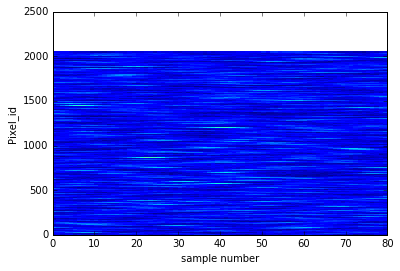

In [8]:
plt.pcolormesh(img)  # note the [0] is for channel 0
plt.xlabel("sample number")
plt.ylabel("Pixel_id")
maxpix = np.unravel_index(np.argmax(img),img.shape)

In [9]:
event.meta.pixel_pos[15]
print(event.meta.optical_foclen)

{16: <Quantity 2.2829999923706055 m>, 1: <Quantity 2.2829999923706055 m>, 2: <Quantity 2.2829999923706055 m>, 3: <Quantity 2.2829999923706055 m>, 4: <Quantity 2.2829999923706055 m>, 7: <Quantity 2.2829999923706055 m>, 8: <Quantity 2.2829999923706055 m>, 9: <Quantity 2.2829999923706055 m>, 10: <Quantity 2.2829999923706055 m>, 14: <Quantity 2.2829999923706055 m>, 15: <Quantity 2.2829999923706055 m>}


In [10]:
geom = CameraGeometry.guess(*event.meta.pixel_pos[15], event.meta.optical_foclen[15])

In [11]:
geom.cam_id

'GATE'

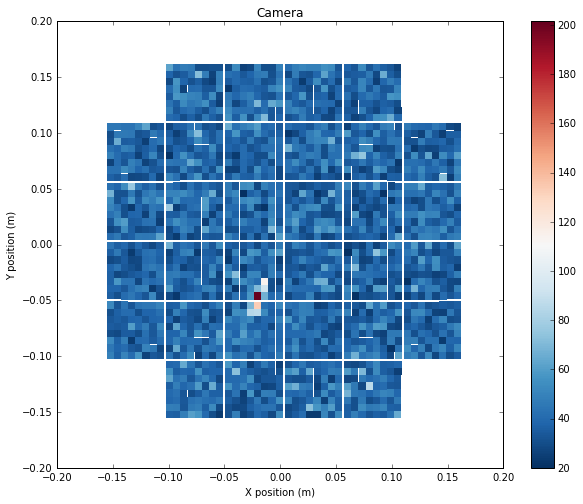

In [12]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

disp = CameraDisplay(geom)
disp.image = img[:,maxpix[1]]
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale

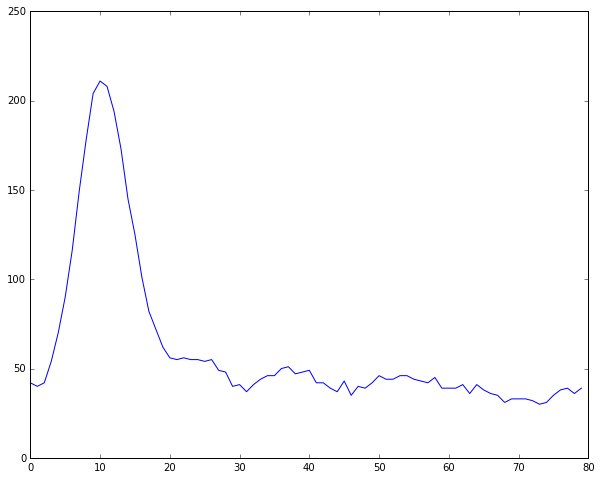

In [13]:
trace = img[maxpix[0]]   
plt.plot(trace)

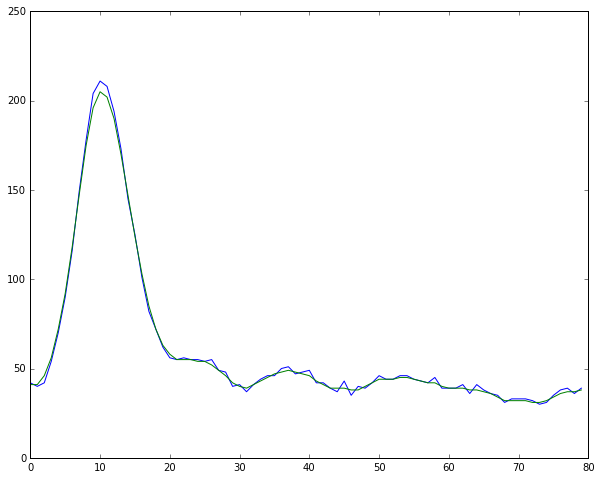

In [14]:
import scipy.ndimage as ndi
plt.plot(img[maxpix[0]])
img2 = ndi.gaussian_filter1d(img,1,axis=1)
plt.plot(img2[maxpix[0]])

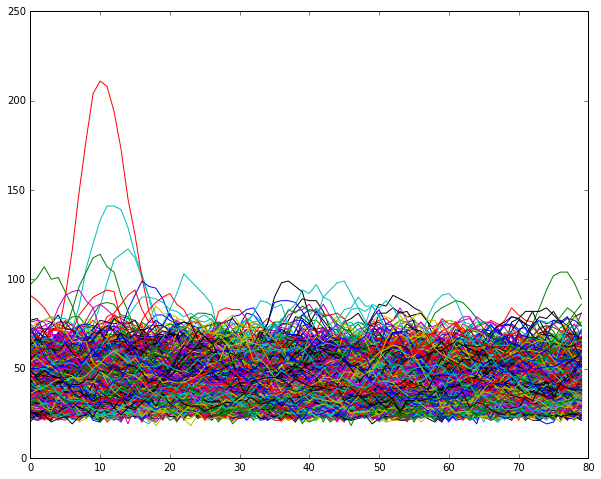

In [15]:
for ii in range(0,2048):
    plt.plot(img[ii])

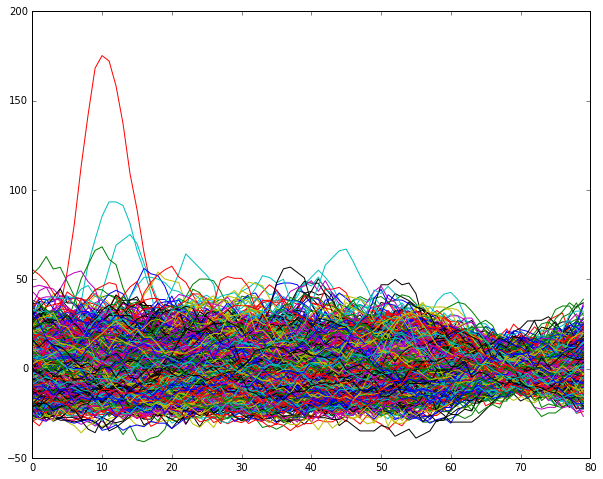

In [16]:
for ii in range(0,2048):
    plt.plot(img[ii] - peds[ii])

In [17]:
plt.plot(img[maxpix[0]] - peds[maxpix[0]])
    plt.plot(img[maxpix[0]])

IndentationError: unexpected indent (<ipython-input-17-88720e6bc7cc>, line 2)

In [ ]:
from scipy import signal
import numpy as np

In [ ]:
pix_ids = np.arange(len(img))
has_signal = sums > 100

widths = np.array([8,]) # peak widths to search for (let's fix it at 8 samples, about the width of the peak)
peaks = [signal.find_peaks_cwt(trace,widths) for trace in img[has_signal] ]

for p,s in zip(pix_ids[has_signal],peaks):
    print("pix{} has peaks at sample {}".format(p,s))
    plt.plot(img[p])
    plt.scatter(np.array(s),img[p,s])

In [ ]:
has_signal

In [ ]:
arr.argsort()[-3:][::-1]